# Dimensionality reduction

In this task you will practice dimensionality reduction.
Use code cells to answer the Tasks and Markdown cells for the Questions (Q's).

In [1]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression


# Load data

In [2]:
(X, y) = load_wine(return_X_y=True)

# split X into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0,stratify=y)

Lets take a quick look at the data:

You can see details and metadata here, including the meaning of features:
https://scikit-learn.org/stable/datasets/index.html#wine-dataset

In [3]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,13.031792,2.332642,2.367170,19.701887,98.556604,2.282170,1.981509,0.375755,1.620849,5.150472,0.951321,2.617830,756.915094
std,0.821117,1.126702,0.271797,3.159023,13.749514,0.573592,1.013492,0.124869,0.592705,2.443026,0.216509,0.680315,326.825135
min,11.460000,0.890000,1.700000,12.000000,70.000000,1.250000,0.470000,0.130000,0.420000,1.740000,0.480000,1.270000,278.000000
25%,12.332500,1.632500,2.210000,17.500000,88.000000,1.800000,1.017500,0.270000,1.252500,3.180000,0.802500,1.972500,510.000000
50%,13.135000,1.845000,2.350000,19.500000,97.000000,2.210000,2.035000,0.360000,1.545000,4.800000,0.960000,2.795000,675.000000
75%,13.677500,3.135000,2.580000,21.575000,105.750000,2.787500,2.855000,0.477500,1.970000,6.200000,1.097500,3.167500,1023.750000
max,14.830000,5.650000,3.230000,28.500000,151.000000,3.380000,5.080000,0.630000,3.580000,13.000000,1.420000,4.000000,1680.000000


Statement: if you perform PCA and maintain all of the principal components, no data is discarded and you did not perform dimensionality reduction.

**Q1 (_max score - 10 points_)** : Do you agree? Explain your answer

Answer:


I agree, we can say that we transformed / scaled the data but as long as we keep all the components we had to begin with, it means we have the same number of dimensions -> We did not perform dimentionality reduction.

# PCA + Random forest

**Task 1 (_max score - 10 points_)**: Use X_train, y_train to train a random forest with the deafult parameters. You can read more about the algorithm in SKlearn's documentation.
Evaulate the algorithm using accuracy score and X_test, y_test.

In [4]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)

rf_preds_test = clf_rf.predict(X_test)

print(f"Test DS accuracy score of RandomForestClassifier(default params): {accuracy_score(y_true=y_test, y_pred=rf_preds_test)}")

Test DS accuracy score of RandomForestClassifier(default params): 0.9861111111111112


**Task 2 (_max score - 10 points_)**: Now do the same, but use PCA.

You are asked to use the **maximal number** of componenets for PCA.
Print the accuracy of Random forest + PCA.

Remeber, you should center and scale your data before you apply PCA.

In [5]:
X_train.shape

(106, 13)

We have 106 samples and 13 features, we know that the maximal number of PCAs is min(#samples, #features), so in our case it's 13:

In [6]:
from sklearn.preprocessing import StandardScaler

# Normalize
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

# Use PCA with 13 components
pca = PCA(13)
pca.fit(X_train_norm)
X_train_pca = pca.transform(X_train_norm)
X_test_pca = pca.transform(X_test_norm)

# Run RandomForestClassifier again and print the accuracy
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_pca, y_train)
rf_pca_preds_test = clf_rf.predict(X_test_pca)
print(f"Test DS accuracy score of RandomForestClassifier + PCA: {accuracy_score(y_true=y_test, y_pred=rf_pca_preds_test)}")

Test DS accuracy score of RandomForestClassifier + PCA: 0.9444444444444444


**Q2 (_max score - 5 points_)**: By applying PCA, did random forest's results improved\stayed the same\got worse? 

Answer:

The random forest classifier results got worse by applying PCA (97.22%~ accuracy to 93.05%~).

# PCA + logistic regression

**Task 3 (_max score - 5 points_)**: repeat task 1 with logistic regression.

In [7]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

lr_preds_test = clf_lr.predict(X_test)

print(f"Test DS accuracy score of LogisticRegression(default params): {accuracy_score(y_true=y_test, y_pred=lr_preds_test)}")

Test DS accuracy score of LogisticRegression(default params): 0.9583333333333334


/Users/adahan/opt/anaconda3/envs/py4dp/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Task 4 (_max score - 5 points_)**: repeast task 2 with logistic regression.

In [8]:
# Run LogisticRegression again on the datasets post PCA and print the accuracy
clf_lr2 = LogisticRegression()
clf_lr2.fit(X_train_pca, y_train)
lr_pca_preds_test = clf_lr2.predict(X_test_pca)
print(f"Test DS accuracy score of LogisticRegression + PCA: {accuracy_score(y_true=y_test, y_pred=lr_pca_preds_test)}")

Test DS accuracy score of LogisticRegression + PCA: 0.9861111111111112


**Q3 (_max score - 5 points_)**: By applying PCA, Did linear regression results improved\stayed the same\got worse?

Answer:

The logistic regression results improved by applying PCA (95.8%~ accuracy to 98.6%~).

**Q4 (max score - 10 points)**: Explain the differences between answers to Q2 and Q3. 

##### Answer

We saw 2 pehnomenas here:
1. In the first part (Q2) we saw that random forest classifier results got worse.
2. In the second part (Q3) we saw that LR by preprocessing the data with PCA.

**For random forest:**

As we did not learn on random forest yet, I can assume that see worse results post the PCA processing in random forest due to the fact that we lost information in some features.
It is possible that due to the fact that random forest is using multiple splits and rectilinear decision boudnries, we can cause drop in performance in case we shifted the axes and therefor now the tree can no longer split the same samples that it could without PCA with the default params.
Also, it might need bigger variance in multiple features rather than just having the "max" variance in the features with the highest pre-existing variance. So loosing the information and the option to better "split" the data here might have yielded a problem to random forest classifier.

**For LR:**

I assume that for features with high correlation, PCA can help us getting independence features and that is the reason we can get better results with LR.

For example using LR to find a decision boundry between 2 features with the same value (except in some minor number of points) can be hard while post the PCA transformation the features can have different values (for example y=X linear line). I added an example for it in the below cell.



In [23]:
arr = [(i, i) for i in np.arange(0, 1, 0.01)]
pca = PCA()
pca.fit_transform(arr)[:10]

array([[ 7.00035713e-01,  4.38704477e-17],
       [ 6.85893578e-01, -8.77757132e-18],
       [ 6.71751442e-01,  8.87599836e-18],
       [ 6.57609307e-01,  2.65295680e-17],
       [ 6.43467171e-01,  1.70675035e-17],
       [ 6.29325035e-01, -3.16468726e-17],
       [ 6.15182900e-01, -1.39933029e-17],
       [ 6.01040764e-01,  3.66026681e-18],
       [ 5.86898628e-01, -1.18701364e-17],
       [ 5.72756493e-01,  1.18517719e-17]])

**Task 5 (_max score - 20 points_)** Finding the optimal number of components:

Your team decided that you must compress the data and PCA was selected. However, you are not sure how many principal components to have. Implement the following techniques (should work without human intervention):

1. Keeping at least 50% of the variance with minimum number of components
2. Keeping above average components only
3. The number of componets which maximize the accuracy of Logistic regression on the test set. Components which improve the accuracy by less than 0.001 are not considered as contributing

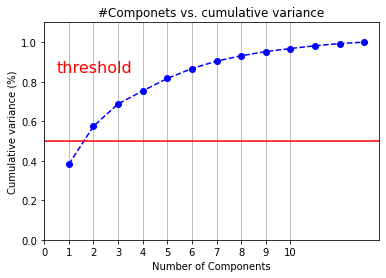

Selected number of components in order to retain at least 50% variance and minimal components: 2


In [9]:
## 5.1. Keeping at least 50% of the variance with minimum number of components

threshold = 0.5

# Let's just fit the PCA without limiting components
pca = PCA()
pca.fit(X_train_norm)

cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
selected_num_of_components = np.min(np.where(cumulative_variance > 0.5)) + 1

# Plotting
fig, ax = plt.subplots()
xi = np.arange(1, 14)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('#Componets vs. cumulative variance')

plt.axhline(y=threshold, color='r', linestyle='-')
plt.text(0.5, 0.85, 'threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show();

print(f"Selected number of components in order to retain at least 50% variance and minimal components: {selected_num_of_components}")


In [10]:
## 5.2. Keeping above average components only

# Let's just fit the PCA without limiting components
pca = PCA()
pca.fit(X_train_norm)

# Since we scaled the data we just need to keep PCs with eigenvalues of at least 1
selected_number_of_components = pca.explained_variance_[pca.explained_variance_ > 1.].shape[0]

print(f"Selected number of components in order to retain above average componenets only: {selected_number_of_components}")


Selected number of components in order to retain above average componenets only: 3


In [11]:
## 5.3. The number of componets which maximize the accuracy of Logistic regression on the test set. Components which improve the accuracy by less than 0.001 are not considered as contributing

max_acc = -1
best_num_of_componenets = 0

for number_of_components in range(1, 14):
    # Use PCA current tested number of components
    pca = PCA(number_of_components)
    pca.fit(X_train_norm)
    X_train_pca = pca.transform(X_train_norm)
    X_test_pca = pca.transform(X_test_norm)

    # Fit and predict LR classifier post PCA transformation
    clf_lr = LogisticRegression()
    clf_lr.fit(X_train_pca, y_train)
    lr_pca_preds_test = clf_lr.predict(X_test_pca)
    
    # Get current accuracy
    acc = accuracy_score(y_true=y_test, y_pred=lr_pca_preds_test)

    # Update best # components if results improved
    if acc - max_acc >= 0.001:
        max_acc = acc
        best_num_of_componenets=number_of_components

    print(f"Print test DS accuracy score of LogisticRegression + PCA with {number_of_components} components: {acc}")

print(f"\nSelected number of components in order to retain the best LogisticRegression accuracy: {best_num_of_componenets} (accuracy - {max_acc})")



Print test DS accuracy score of LogisticRegression + PCA with 1 components: 0.8611111111111112
Print test DS accuracy score of LogisticRegression + PCA with 2 components: 0.9444444444444444
Print test DS accuracy score of LogisticRegression + PCA with 3 components: 0.9305555555555556
Print test DS accuracy score of LogisticRegression + PCA with 4 components: 0.9722222222222222
Print test DS accuracy score of LogisticRegression + PCA with 5 components: 0.9722222222222222
Print test DS accuracy score of LogisticRegression + PCA with 6 components: 0.9722222222222222
Print test DS accuracy score of LogisticRegression + PCA with 7 components: 0.9861111111111112
Print test DS accuracy score of LogisticRegression + PCA with 8 components: 0.9861111111111112
Print test DS accuracy score of LogisticRegression + PCA with 9 components: 0.9861111111111112
Print test DS accuracy score of LogisticRegression + PCA with 10 components: 0.9861111111111112
Print test DS accuracy score of LogisticRegressio

# Eigenfaces

The approach of using eigenfaces for recognition was developed by Sirovich and Kirby (1987) and used by Matthew Turk and Alex Pentland in face classification. The eigenfaces themselves form a basis set of all images used to construct the covariance matrix. Wikipedia: https://en.wikipedia.org/wiki/Eigenface

The following code illustrates what each eigenface stands for. Follow the code and the comments:

Total dataset size:
n_samples: 1288
n_features: 1850
Extracting the top 150 eigenfaces from 1288 faces


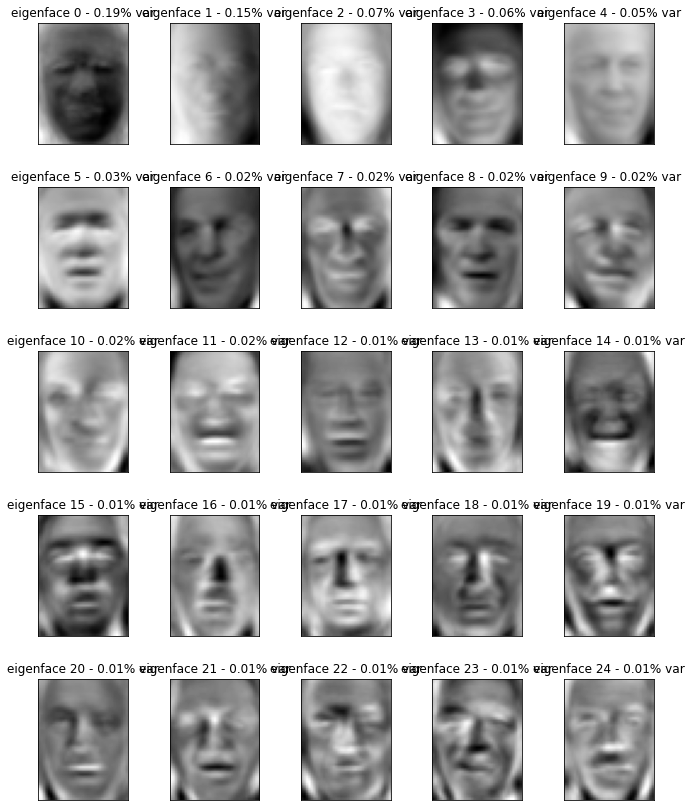

In [12]:
from time import time
import logging
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
from sklearn.svm import SVC


# #############################################################################
# Download the data, if not already on disk and load it as numpy arrays

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machine learning we use the 2 data directly (as relative pixel
# positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

print("Total dataset size:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)



# #############################################################################
# Compute a PCA (eigenfaces) on the face dataset (treated as unlabeled
# dataset): unsupervised feature extraction / dimensionality reduction
n_components = 150

print("Extracting the top %d eigenfaces from %d faces" % (n_components, X.shape[0]))
pca = PCA(n_components=n_components, 
          svd_solver='randomized',
          whiten=True).fit(X)

eigenfaces = pca.components_.reshape((n_components, h, w))

# Helper function
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

#############################################################################
# plot the gallery of the most significative eigenfaces
eigenface_titles = ["eigenface {} - {:3.2f}% var".format(i, pca.explained_variance_ratio_[i]) for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w, n_row=5, n_col=5)

**Task 6 (_max score - 20 points_)**: Plot the reconstruction of an image with different number of principal components used (1 to 30 components). However, for effiency, you are not allowed to refit the PCA object.

The resulting plot will allow us to understand the contribution of each principal component.
Check the result for different images



#### Image 10 ####

# Original Image:


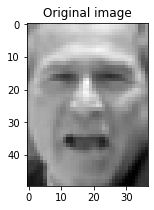


# Reconstruction using different comonents number:


<Figure size 1440x720 with 0 Axes>

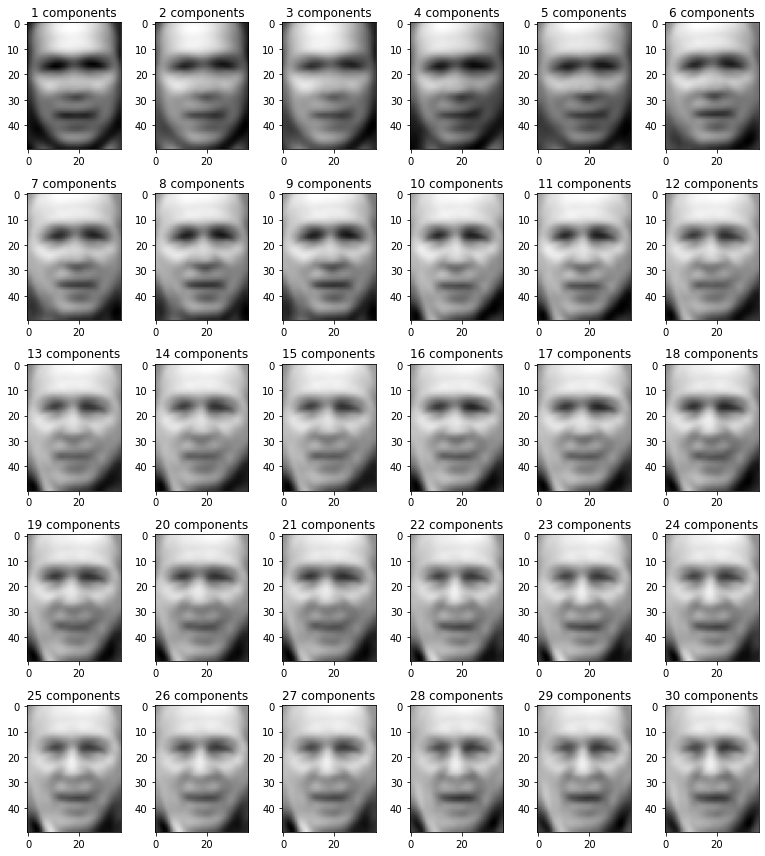



#### Image 20 ####

# Original Image:


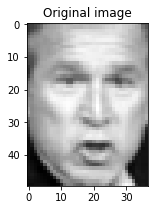


# Reconstruction using different comonents number:


<Figure size 1440x720 with 0 Axes>

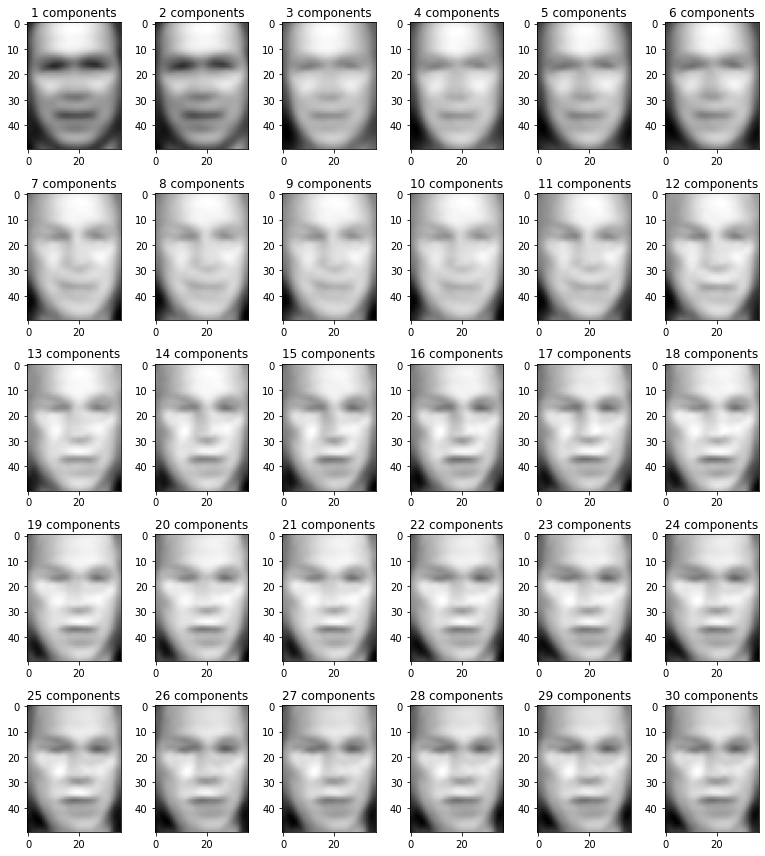



#### Image 30 ####

# Original Image:


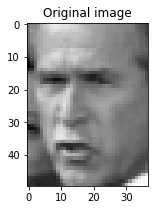


# Reconstruction using different comonents number:


<Figure size 1440x720 with 0 Axes>

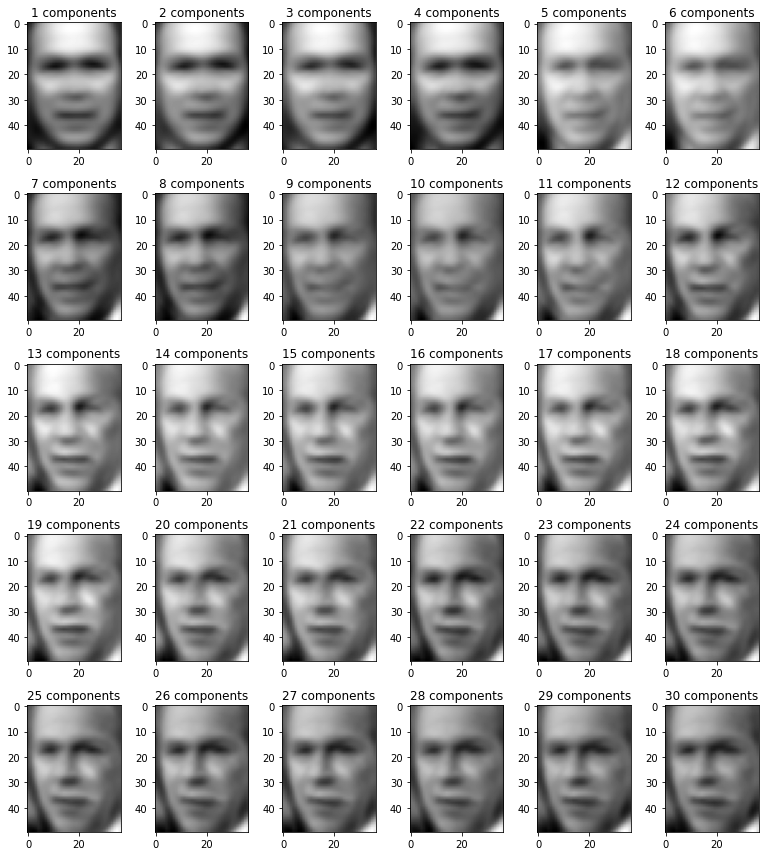



#### Image 40 ####

# Original Image:


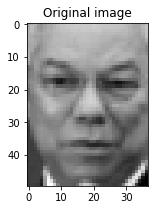


# Reconstruction using different comonents number:


<Figure size 1440x720 with 0 Axes>

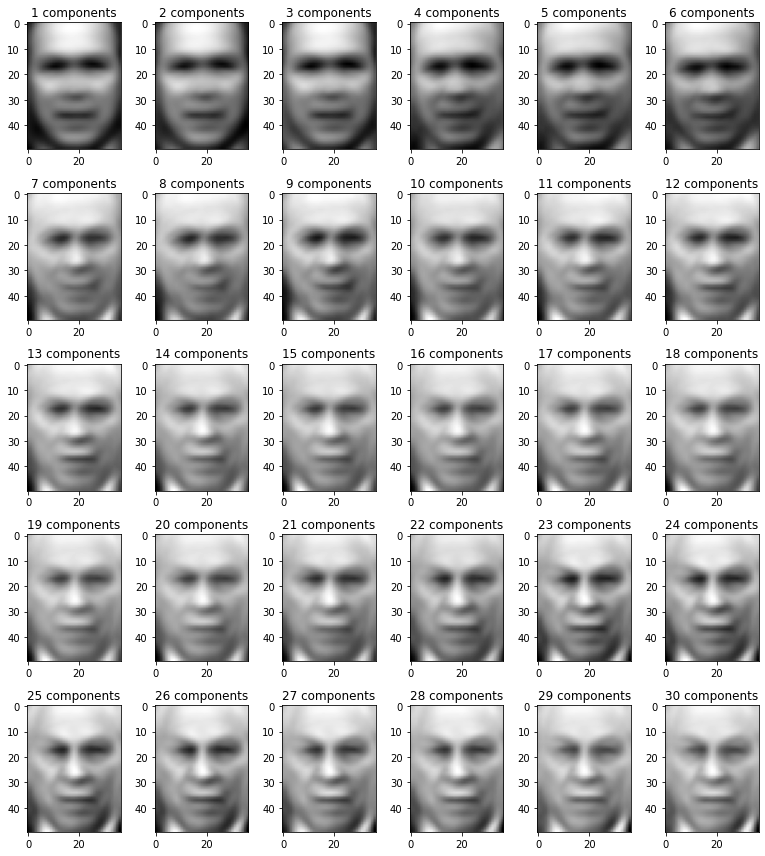

In [14]:
# For a specific image, see how adding PCs affect the reconstruction

images = [10, 20, 30, 40]

for img_idx in images:
  pic = X[img_idx] # choose any arbitrary image
  numPCs = 30

  print(f"\n\n#### Image {img_idx} ####")
  print("\n# Original Image:")
  plt.figure(figsize=(3,3))
  plt.imshow(pic.reshape((h, w)), cmap=plt.cm.gray)
  plt.title(f"Original image", size=12)
  plt.show()

  plt.figure(figsize=(20,10))
  plt.figure(figsize=(1.8 * numPCs/5, 2.4 * 5))
  
  print("\n# Reconstruction using different comonents number:")
  for i in range(1, numPCs+1):
    ### Take the first i principal components
    top_i_components = pca.components_[:i]
    top_i_eigenvalues = pca.explained_variance_[:i]

    ### Reduce the dimensionality of the image
    pic_norm = pic - pca.mean_
    pic_transformed = np.dot(pic_norm, top_i_components.T)
    pic_transformed /= np.sqrt(top_i_eigenvalues)

    ### Reconstruct the image to the original dimension
    reconstructed = np.dot(pic_transformed,
                          np.sqrt(top_i_eigenvalues[:, np.newaxis]) * top_i_components) + pca.mean_
    pic_shaped = reconstructed.reshape((h, w))

    ### Plot the image
    plt.subplot(5, 6, i)
    plt.imshow(pic_shaped, cmap=plt.cm.gray)
    plt.title(f"{i} components", size=12)

    # You are not allowed to refit the pca object
    # Hint: take a look at sklearn's PCA transform and inverse_transform implementation
  plt.tight_layout()
  plt.show();